# **Massive User Registration**

Saving massive_user_registration.log to massive_user_registration (3).log


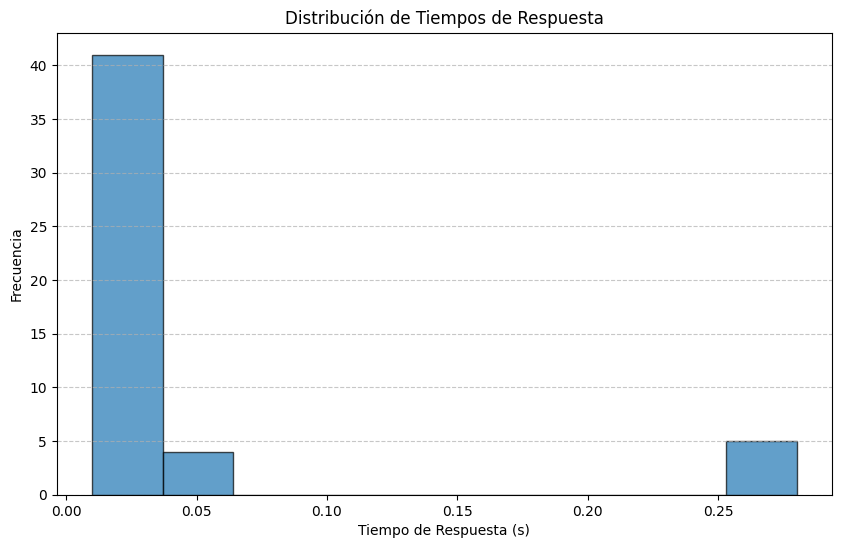

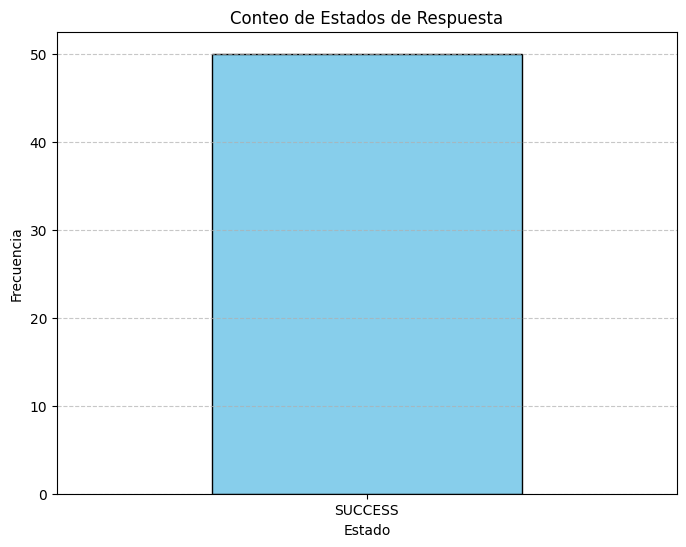

Resumen Estadístico de los Tiempos de Respuesta:
count    50.000000
mean      0.045200
std       0.079443
min       0.010000
25%       0.012500
50%       0.020000
75%       0.020000
max       0.280000
Name: time, dtype: float64


In [5]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Subir el archivo de logs
from google.colab import files
uploaded = files.upload()

# Leer el archivo de logs
log_file = list(uploaded.keys())[0]
with open(log_file, 'r') as file:
    log_data = file.read()

# Expresión regular para extraer datos relevantes
log_pattern = re.compile(
    r"(?P<timestamp>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) - INFO - \[(?P<status>\w+)\] User created: .*?'id': (?P<id>\d+), .*?'email': '(?P<email>.*?)', .*?\(Time: (?P<time>\d+\.\d+)s\)"
)

# Extraer datos del log
matches = log_pattern.findall(log_data)

# Convertir los datos en un DataFrame
df = pd.DataFrame(matches, columns=["timestamp", "status", "id", "email", "time"])
df["time"] = df["time"].astype(float)  # Convertir tiempo a flotante

# Verificar si el DataFrame tiene datos
if not df.empty:
    # Gráfico 1: Distribución de Tiempos de Respuesta
    plt.figure(figsize=(10, 6))
    plt.hist(df["time"], bins=10, alpha=0.7, edgecolor="black")
    plt.title("Distribución de Tiempos de Respuesta")
    plt.xlabel("Tiempo de Respuesta (s)")
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Gráfico 2: Conteo de Estados de Respuesta
    status_counts = df["status"].value_counts()
    plt.figure(figsize=(8, 6))
    status_counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Conteo de Estados de Respuesta")
    plt.xlabel("Estado")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Resumen Estadístico de los Tiempos de Respuesta
    print("Resumen Estadístico de los Tiempos de Respuesta:")
    print(df["time"].describe())
else:
    print("No se encontraron datos en el log.")


# **Massive Get Requests**

Saving massive_get_requests.log to massive_get_requests.log


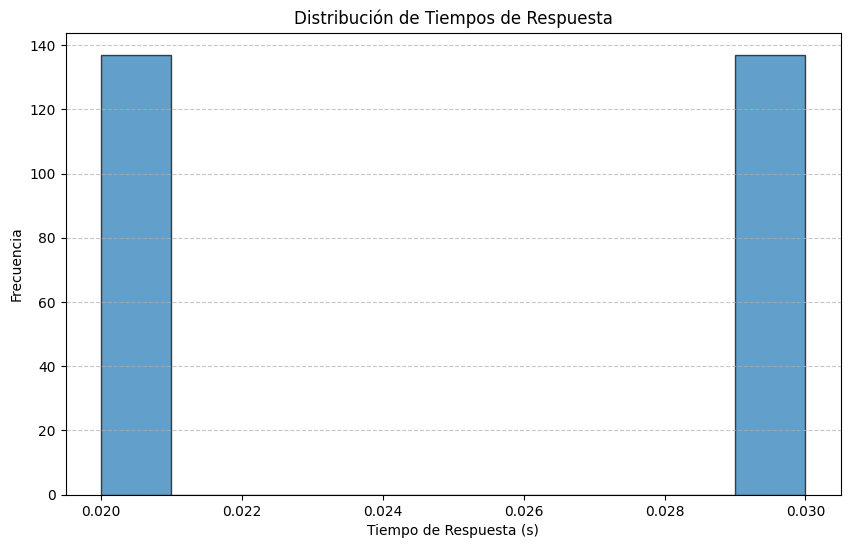

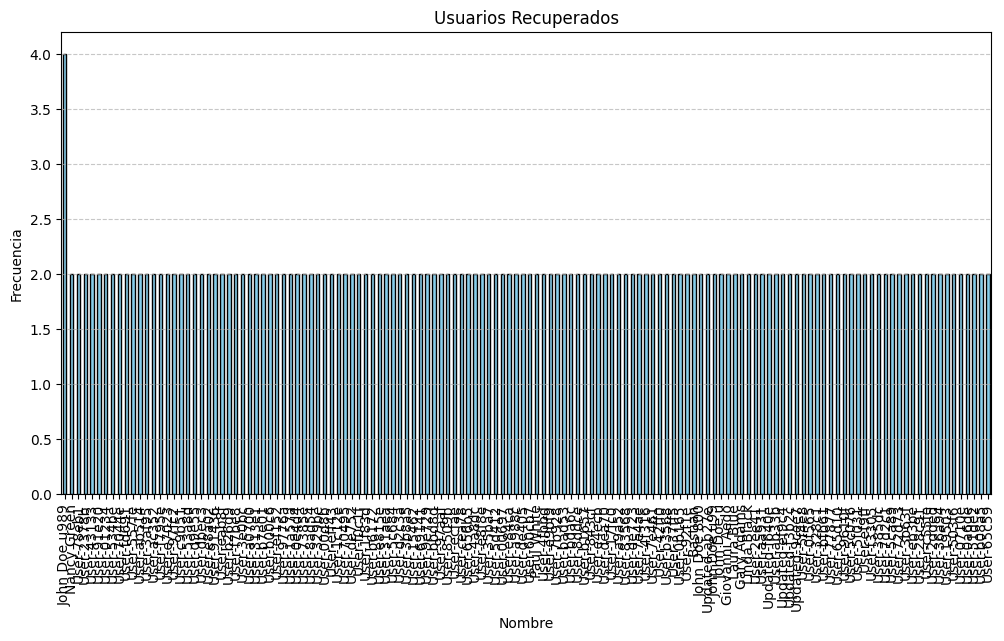

Resumen de Datos Recuperados:
                id identification           name                    email  \
count   274.000000            274            274                      274   
unique         NaN            137            136                      137   
top            NaN       DNI77889  John Doe u989  nancy.green@example.com   
freq           NaN              2              4                        2   
mean     77.036496            NaN            NaN                      NaN   
std      41.198600            NaN            NaN                      NaN   
min       0.000000            NaN            NaN                      NaN   
25%      44.000000            NaN            NaN                      NaN   
50%      78.000000            NaN            NaN                      NaN   
75%     112.000000            NaN            NaN                      NaN   
max     146.000000            NaN            NaN                      NaN   

           password        time  
count      

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Subir el archivo de logs
from google.colab import files
uploaded = files.upload()

# Leer el archivo de logs
log_file = list(uploaded.keys())[0]
with open(log_file, 'r') as file:
    log_data = file.read()

# Expresión regular para extraer los datos del log
log_pattern = re.compile(
    r"\[(?P<status>\w+)\] GET request successful: (?P<data>\[.*?\]) \(Time: (?P<time>\d+\.\d+)s\)"
)

# Extraer coincidencias del log
matches = log_pattern.findall(log_data)

# Extraer registros de usuarios
user_records = []
for match in matches:
    status, data, time = match
    time = float(time)
    users = eval(data)  # Convertir la cadena de texto del log a una lista de diccionarios
    for user in users:
        user["time"] = time  # Añadir el tiempo de respuesta al registro del usuario
        user_records.append(user)

# Convertir los registros de usuarios en un DataFrame
df = pd.DataFrame(user_records)

# Verificar si hay datos en el DataFrame
if not df.empty:
    # Gráfico 1: Distribución de Tiempos de Respuesta
    plt.figure(figsize=(10, 6))
    plt.hist(df["time"], bins=10, alpha=0.7, edgecolor="black")
    plt.title("Distribución de Tiempos de Respuesta")
    plt.xlabel("Tiempo de Respuesta (s)")
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Gráfico 2: Conteo de Usuarios Recuperados por Nombre
    user_count = df["name"].value_counts()
    plt.figure(figsize=(12, 6))
    user_count.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Usuarios Recuperados")
    plt.xlabel("Nombre")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Resumen Estadístico
    print("Resumen de Datos Recuperados:")
    print(df.describe(include="all"))
else:
    print("No se encontraron datos en el log.")


# **Api Requests**

Saving api_requests.log to api_requests.log


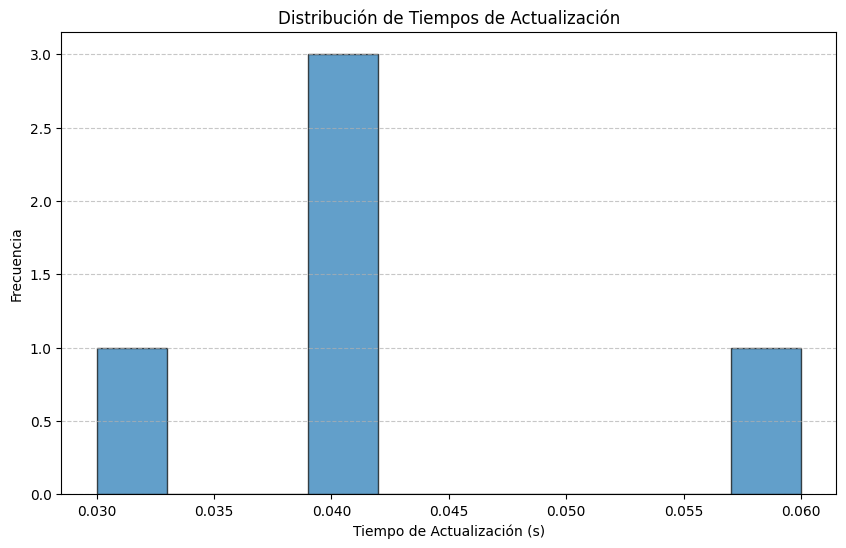

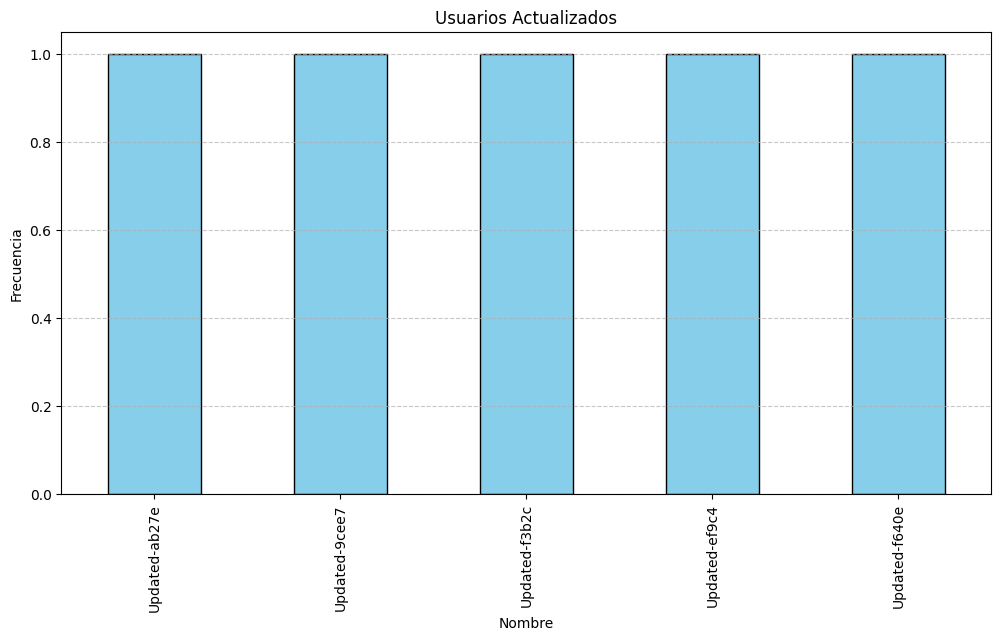

Resumen de Datos de Actualización:
         status user_id   id identification           name  \
count         5       5    5              5              5   
unique        1       5    5              5              5   
top     SUCCESS       1    1         108228  Updated-ab27e   
freq          5       1    1              1              1   
mean        NaN     NaN  NaN            NaN            NaN   
std         NaN     NaN  NaN            NaN            NaN   
min         NaN     NaN  NaN            NaN            NaN   
25%         NaN     NaN  NaN            NaN            NaN   
50%         NaN     NaN  NaN            NaN            NaN   
75%         NaN     NaN  NaN            NaN            NaN   
max         NaN     NaN  NaN            NaN            NaN   

                          email             password      time  
count                         5                    5  5.000000  
unique                        5                    1       NaN  
top     updated2670@examp

In [7]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Subir el archivo de logs
from google.colab import files
uploaded = files.upload()

# Leer el archivo de logs
log_file = list(uploaded.keys())[0]
with open(log_file, 'r') as file:
    log_data = file.read()

# Expresión regular para extraer datos
log_pattern = re.compile(
    r"\[(?P<status>\w+)\] User (?P<user_id>\d+) updated: "
    r"\{'id': (?P<id>\d+), 'identification': '(?P<identification>.*?)', "
    r"'name': '(?P<name>.*?)', 'email': '(?P<email>.*?)', "
    r"'password': '(?P<password>.*?)'\} \(Time: (?P<time>\d+\.\d+)s\)"
)

# Extraer coincidencias del log
matches = log_pattern.findall(log_data)

# Convertir los datos en un DataFrame
columns = ["status", "user_id", "id", "identification", "name", "email", "password", "time"]
df = pd.DataFrame(matches, columns=columns)
df["time"] = df["time"].astype(float)  # Convertir la columna "time" a flotante

# Generar visualizaciones si el DataFrame tiene datos
if not df.empty:
    # Gráfico 1: Distribución de Tiempos de Actualización
    plt.figure(figsize=(10, 6))
    plt.hist(df["time"], bins=10, alpha=0.7, edgecolor="black")
    plt.title("Distribución de Tiempos de Actualización")
    plt.xlabel("Tiempo de Actualización (s)")
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Gráfico 2: Conteo de Usuarios Actualizados por Nombre
    user_count = df["name"].value_counts()
    plt.figure(figsize=(12, 6))
    user_count.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Usuarios Actualizados")
    plt.xlabel("Nombre")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Resumen Estadístico
    print("Resumen de Datos de Actualización:")
    print(df.describe(include="all"))
else:
    print("No se encontraron datos en el log.")


# **User Get**

Saving user_get_requests.log to user_get_requests (1).log


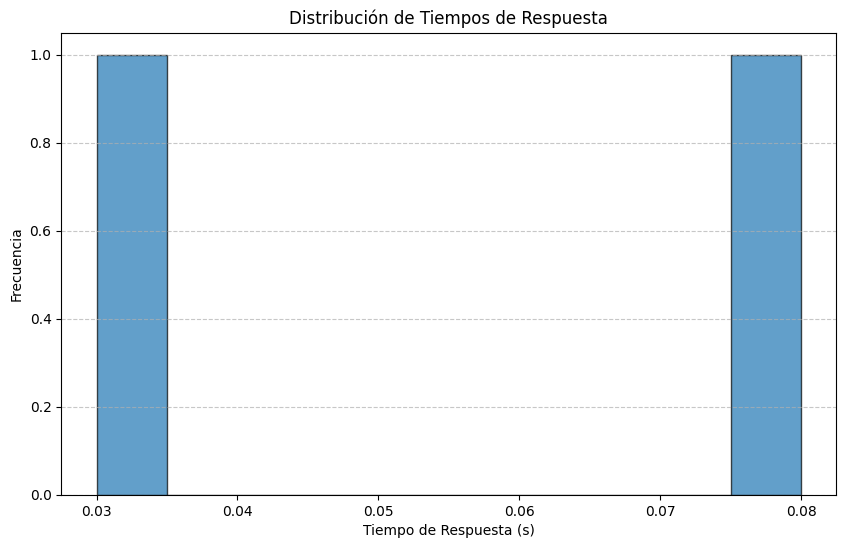

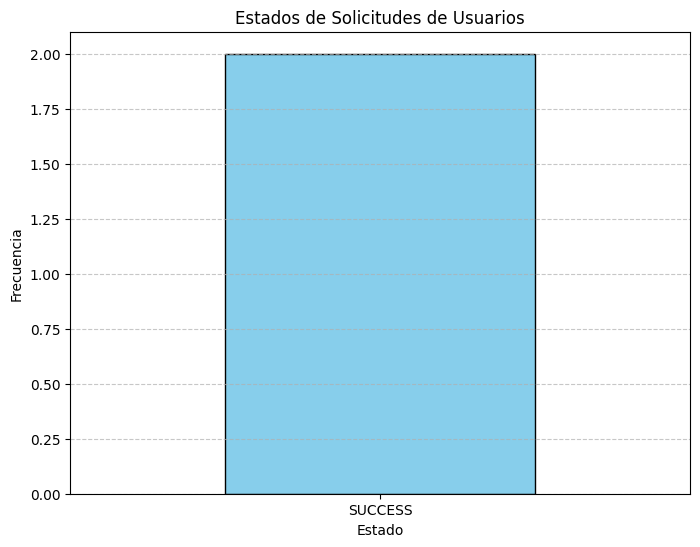

Resumen de Datos de Solicitudes de Usuarios:
         status   user_id     action        id identification           name  \
count         2  2.000000          2  2.000000              2              2   
unique        1       NaN          1       NaN              2              2   
top     SUCCESS       NaN  retrieved       NaN         108228  Updated-ab27e   
freq          2       NaN          2       NaN              1              1   
mean        NaN  2.000000        NaN  2.000000            NaN            NaN   
std         NaN  1.414214        NaN  1.414214            NaN            NaN   
min         NaN  1.000000        NaN  1.000000            NaN            NaN   
25%         NaN  1.500000        NaN  1.500000            NaN            NaN   
50%         NaN  2.000000        NaN  2.000000            NaN            NaN   
75%         NaN  2.500000        NaN  2.500000            NaN            NaN   
max         NaN  3.000000        NaN  3.000000            NaN            Na

In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Subir el archivo de logs
from google.colab import files
uploaded = files.upload()

# Leer el archivo de logs
log_file = list(uploaded.keys())[0]
with open(log_file, 'r') as file:
    log_data = file.read()

# Expresión regular para extraer datos
log_pattern = re.compile(
    r"\[(?P<status>\w+)\] User (?P<user_id>\d+) (?P<action>\w+): "
    r"(?:\{'id': (?P<id>\d+), 'identification': '(?P<identification>.*?)', "
    r"'name': '(?P<name>.*?)', 'email': '(?P<email>.*?)', 'password': '(?P<password>.*?)'\} )?\(Time: (?P<time>\d+\.\d+)s\)"
)

# Extraer coincidencias del log
matches = log_pattern.findall(log_data)

# Convertir los datos en un DataFrame
columns = ["status", "user_id", "action", "id", "identification", "name", "email", "password", "time"]
df = pd.DataFrame(matches, columns=columns)

# Limpiar y convertir tipos de datos
df["time"] = df["time"].astype(float)
df["user_id"] = df["user_id"].astype(int)
df["id"] = pd.to_numeric(df["id"], errors="coerce")

# Generar visualizaciones si el DataFrame tiene datos
if not df.empty:
    # Gráfico 1: Distribución de Tiempos de Respuesta
    plt.figure(figsize=(10, 6))
    plt.hist(df["time"], bins=10, alpha=0.7, edgecolor="black")
    plt.title("Distribución de Tiempos de Respuesta")
    plt.xlabel("Tiempo de Respuesta (s)")
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Gráfico 2: Conteo de Estados (SUCCESS, NOT FOUND)
    status_counts = df["status"].value_counts()
    plt.figure(figsize=(8, 6))
    status_counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Estados de Solicitudes de Usuarios")
    plt.xlabel("Estado")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Resumen Estadístico
    print("Resumen de Datos de Solicitudes de Usuarios:")
    print(df.describe(include="all"))
else:
    print("No se encontraron datos en el log.")
